<a href="https://colab.research.google.com/github/seluang/naive-Bayes/blob/main/Uji_TA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
file_path = '/content/drive/MyDrive/Colab Notebooks/TA_SKRIPSI/Uji_Kib_B.xlsx'
df = pd.read_excel(file_path)

In [34]:
df.head()

,ID,Kode Barang,Nama Barang,Nomor Register,Bahan,Tahun Perolehan,Frekuensi Perbaikan,Harga,Kondisi,Umur Barang (Tahun),UNIT SKPD,Usulan Ubah Kondisi
0,21,1.3.2.10.2.3.3,Printer (Peralatan Personal Komputer),62,Plastik / Besi,2022,1,4500000.0,Baik,3,SEKRETARIAT DPRD,Tidak
1,22,1.3.2.10.2.3.3,Printer (Peralatan Personal Komputer),63,Plastik / Besi,2022,1,4500000.0,Baik,3,SEKRETARIAT DPRD,Tidak
2,28,1.3.2.10.1.2.1,P.C Unit,58,Plastik dan Besi,2022,1,9990000.0,Baik,3,SEKRETARIAT DPRD,Tidak
3,29,1.3.2.10.1.2.1,P.C Unit,59,Plastik dan Besi,2022,1,9990000.0,Baik,3,SEKRETARIAT DPRD,Tidak
4,30,1.3.2.10.1.2.1,P.C Unit,60,Plastik dan Besi,2022,1,9990000.0,Baik,3,SEKRETARIAT DPRD,Tidak


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9036 entries, 0 to 9035
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9036 non-null   int64  
 1   Kode Barang          9036 non-null   object 
 2   Nama Barang          9036 non-null   object 
 3   Nomor Register       9036 non-null   int64  
 4   Bahan                8922 non-null   object 
 5   Tahun Perolehan      9036 non-null   int64  
 6   Frekuensi Perbaikan  9036 non-null   int64  
 7   Harga                9036 non-null   float64
 8   Kondisi              9036 non-null   object 
 9   Umur Barang (Tahun)  9036 non-null   int64  
 10  UNIT SKPD            9036 non-null   object 
 11  Usulan Ubah Kondisi  9036 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 847.3+ KB


In [36]:
# Fill missing values in 'Bahan' with the mode
df['Bahan'] = df['Bahan'].fillna(df['Bahan'].mode()[0])

# Verify that there are no more missing values in 'Bahan'
print(df.isnull().sum())
df.info()

ID                     0
Kode Barang            0
Nama Barang            0
Nomor Register         0
Bahan                  0
Tahun Perolehan        0
Frekuensi Perbaikan    0
Harga                  0
Kondisi                0
Umur Barang (Tahun)    0
UNIT SKPD              0
Usulan Ubah Kondisi    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9036 entries, 0 to 9035
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9036 non-null   int64  
 1   Kode Barang          9036 non-null   object 
 2   Nama Barang          9036 non-null   object 
 3   Nomor Register       9036 non-null   int64  
 4   Bahan                9036 non-null   object 
 5   Tahun Perolehan      9036 non-null   int64  
 6   Frekuensi Perbaikan  9036 non-null   int64  
 7   Harga                9036 non-null   float64
 8   Kondisi              9036 non-null   object 
 9   Umur Barang (Tahun)  9036

In [37]:
# Isi nilai yang hilang di 'Bahan' dengan mode
df['Bahan'] = df['Bahan'].fillna(df['Bahan'].mode()[0])

#Verifikasi bahwa tidak ada lagi nilai yang hilang di 'Bahan'
print(df.isnull().sum())
df.info()

ID                     0
Kode Barang            0
Nama Barang            0
Nomor Register         0
Bahan                  0
Tahun Perolehan        0
Frekuensi Perbaikan    0
Harga                  0
Kondisi                0
Umur Barang (Tahun)    0
UNIT SKPD              0
Usulan Ubah Kondisi    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9036 entries, 0 to 9035
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9036 non-null   int64  
 1   Kode Barang          9036 non-null   object 
 2   Nama Barang          9036 non-null   object 
 3   Nomor Register       9036 non-null   int64  
 4   Bahan                9036 non-null   object 
 5   Tahun Perolehan      9036 non-null   int64  
 6   Frekuensi Perbaikan  9036 non-null   int64  
 7   Harga                9036 non-null   float64
 8   Kondisi              9036 non-null   object 
 9   Umur Barang (Tahun)  9036

In [38]:
features = ['Tahun Perolehan', 'Frekuensi Perbaikan', 'Harga', 'Umur Barang (Tahun)']
label = 'Kondisi'
df_clean = df[features + [label]].dropna()
X = df_clean[features]
y = df_clean[label]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [41]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

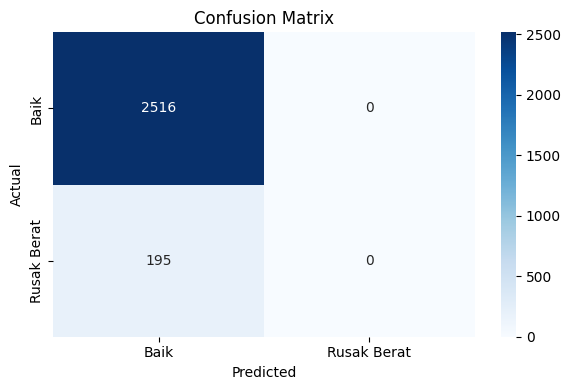

In [42]:
#Confusion matrix (data training sebanyak 70% dan data testing sebanyak 30%,
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [43]:
#Classification report data training sebanyak 70% dan data testing sebanyak 30%

print(classification_report(y_test, y_pred, target_names=model.classes_, zero_division=0))
print(f"Akurasi: {accuracy:.1%}")

              precision    recall  f1-score   support

        Baik       0.93      1.00      0.96      2516
 Rusak Berat       0.00      0.00      0.00       195

    accuracy                           0.93      2711
   macro avg       0.46      0.50      0.48      2711
weighted avg       0.86      0.93      0.89      2711

Akurasi: 92.8%


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [45]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [46]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

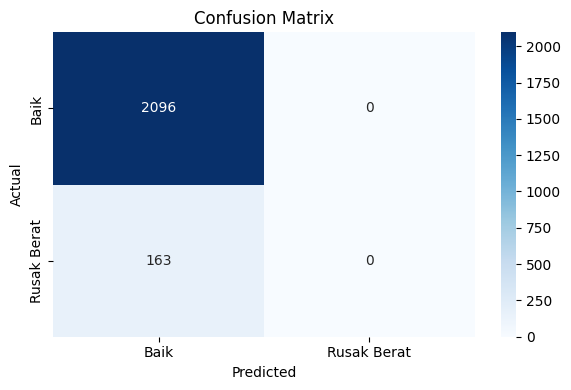

In [47]:
#Confusion matrix (data training sebanyak 75% dan data testing sebanyak 25%,
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [48]:
#Classification report data training sebanyak 75% dan data testing sebanyak 25%

print(classification_report(y_test, y_pred, target_names=model.classes_, zero_division=0))
print(f"Akurasi: {accuracy:.1%}")

              precision    recall  f1-score   support

        Baik       0.93      1.00      0.96      2096
 Rusak Berat       0.00      0.00      0.00       163

    accuracy                           0.93      2259
   macro avg       0.46      0.50      0.48      2259
weighted avg       0.86      0.93      0.89      2259

Akurasi: 92.8%


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [51]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

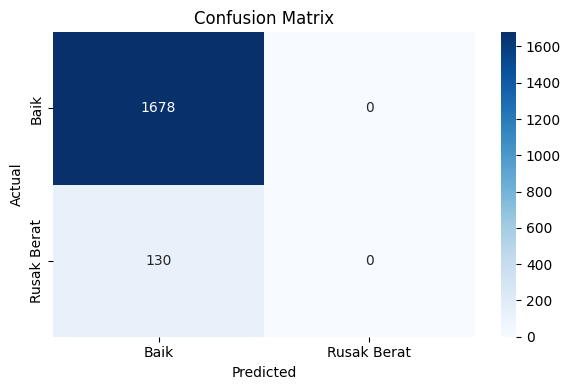

In [52]:
#data training sebanyak 80% dan data testing sebanyak 20%
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [53]:
# Classification report Data training sebanyak 80% dan data testing sebanyak 20%

print(classification_report(y_test, y_pred, target_names=model.classes_, zero_division=0))
print(f"Akurasi: {accuracy:.1%}")


              precision    recall  f1-score   support

        Baik       0.93      1.00      0.96      1678
 Rusak Berat       0.00      0.00      0.00       130

    accuracy                           0.93      1808
   macro avg       0.46      0.50      0.48      1808
weighted avg       0.86      0.93      0.89      1808

Akurasi: 92.8%
